In [80]:
#import numpy as np
import pandas as pd

import torch
#import torch.nn as nn
#import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader#, random_split

import torchvision
import torchvision.transforms as T
import matplotlib
import matplotlib.pyplot as plt

In [81]:
import cv2 as cv

def video_to_tensor(path):
    cap = cv.VideoCapture(path)
    
    height = int(cap.get(cv.CAP_PROP_FRAME_HEIGHT))
    width = int(cap.get(cv.CAP_PROP_FRAME_WIDTH))
    num_frames = int(cap.get(cv.CAP_PROP_FRAME_COUNT))
    
    frames = torch.FloatTensor(3, num_frames, height, width)
    
    for i in range(num_frames):# while(cap.isOpened()):
        #cap.set(cv.CAP_PROP_POS_FRAMES, i) # to set the video position
        ret, frame = cap.read()
        if ret == False:
            break
        frame = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
        frame = torch.from_numpy(frame)
        frame = frame.permute(2, 0, 1) # (H x W x C) to (C x H x W)
        frames[:, i, :, :] = frame.float()
    
    cap.release()
    
    return frames / 255

In [134]:
# Define Dataset class
class WLASLDataset(Dataset):
    """Class to load WLASL videos and labels."""
    def __init__(self, csv_file, transforms=None):
        self.dataframe = pd.read_csv(csv_file)
        self.classes = self.dataframe.label.unique().tolist()
        self.transforms = transforms

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, index):
        if torch.is_tensor(index):
            index = index.tolist()
        
        video = video_to_tensor(self.dataframe.iloc[index].path)
        if self.transforms:
            video = self.transforms(video)
        
        label = self.dataframe.iloc[index].label
        #label = classes.index(label)
        
        return video, label

dataset = WLASLDataset("./wlasl5.csv")
print('elements: '+str(len(dataset)))
print('classes: '+str(dataset.classes))

elements: 157
classes: ['BEFORE', 'BOOK', 'CHAIR', 'COMPUTER', 'DRINK']


torch.Size([3, 74, 256, 256])


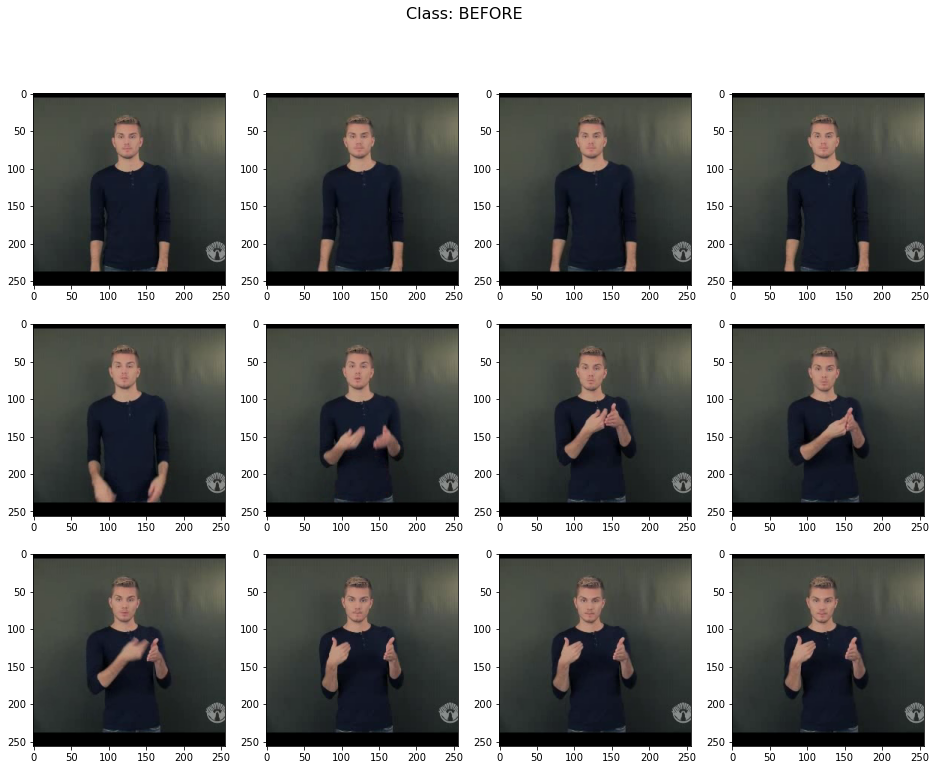

In [94]:
video, label = dataset[1]
print(video.size())
_,n_frames,_,_ = video.size()

n_row = 3
n_col = 4
r = n_row*n_col
if r*4 > n_frames: r = int(n_frames / 4)

plt.figure(figsize=(16,n_row*4))
plt.suptitle('Class: '+label, fontsize=16)
for i in range(r):
    plt.subplot(n_row,n_col,i+1)
    frame = T.ToPILImage()(video[:, i*4, :, :])
    plt.imshow(frame)
plt.show()

In [102]:
data_loader = DataLoader(dataset, batch_size=1, shuffle=True)
for video, label in data_loader:
    print(video.size(), label[0])

torch.Size([1, 3, 12, 256, 256]) BEFORE
torch.Size([1, 3, 77, 256, 256]) BEFORE
torch.Size([1, 3, 45, 256, 256]) DRINK
torch.Size([1, 3, 79, 256, 256]) DRINK
torch.Size([1, 3, 89, 256, 256]) DRINK
torch.Size([1, 3, 47, 256, 256]) BEFORE
torch.Size([1, 3, 64, 256, 256]) BOOK
torch.Size([1, 3, 38, 256, 256]) COMPUTER
torch.Size([1, 3, 87, 256, 256]) BEFORE
torch.Size([1, 3, 41, 256, 256]) BEFORE
torch.Size([1, 3, 96, 256, 256]) CHAIR
torch.Size([1, 3, 52, 256, 256]) COMPUTER
torch.Size([1, 3, 75, 256, 256]) BOOK
torch.Size([1, 3, 33, 256, 256]) BOOK
torch.Size([1, 3, 32, 256, 256]) BEFORE
torch.Size([1, 3, 61, 256, 256]) CHAIR
torch.Size([1, 3, 40, 256, 256]) COMPUTER
torch.Size([1, 3, 88, 256, 256]) COMPUTER
torch.Size([1, 3, 51, 256, 256]) CHAIR
torch.Size([1, 3, 33, 256, 256]) BOOK
torch.Size([1, 3, 96, 256, 256]) BEFORE
torch.Size([1, 3, 55, 256, 256]) DRINK
torch.Size([1, 3, 93, 256, 256]) BOOK
torch.Size([1, 3, 75, 256, 256]) COMPUTER
torch.Size([1, 3, 65, 256, 256]) DRINK
torch.Si